# Analisis Distribusi Data ENose Kakao

> 2 Juni 2022

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [1]:
from datetime import date

import numpy as np
import pandas as pd
import seaborn as sns
from snhlib.image import Style
from snhlib.multitools import DataGeNose

%config InlineBackend.figure_formats = ['svg']  # svg | retina == png high res
%matplotlib inline

In [2]:
tanggal = f"{date.today().year}_{date.today().month}_{date.today().day}"
print(tanggal)

2022_6_3


In [4]:
COLS = [f"S{i+1}" for i in range(10)]


def diff(y):
    y0 = y[0]
    return np.max(y - y0)


def convert_maxdata(df: pd.DataFrame) -> np.ndarray:
    new_df = pd.DataFrame(df[COLS].apply(np.max))
    return new_df


def convert_diff(df: pd.DataFrame) -> np.ndarray:
    new_df = pd.DataFrame(df[COLS].apply(diff))
    return new_df


def plot_box(data: pd.DataFrame, names: str):
    data.sort_values(by=["group"], inplace=True)
    data_melt = pd.melt(data, id_vars=["group"], value_vars=COLS)
    fig, ax = Style().paper()
    ax = sns.boxplot(data=data_melt, x="variable", y="value", hue="group")
    ax.set_xlabel("Sensor")
    ax.set_ylabel(names)
    return fig

## Baseline value

In [4]:
baseline = pd.read_parquet("data/data_baseline.parquet")
baseline.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,label,group,names
0,1490.88125,2931.89750,1288.250,2130.77625,2026.55625,2152.72,1288.500,2156.5875,3305.875,2866.625,0,B,TK65-1
1,1830.87000,3192.13500,1353.125,2460.25750,2163.08375,2259.97,1415.375,2788.0575,3490.500,3114.500,0,B,TK39-1
2,1767.59000,3164.47625,1329.000,2398.37750,2129.25500,2232.47,1379.750,2720.4000,3475.375,3090.000,0,B,TK41-1
3,1661.93500,3068.55625,1325.250,2297.07875,2100.64000,2207.50,1364.250,2545.7925,3401.625,3022.375,0,B,TK26-1
4,1718.15250,3117.19750,1326.250,2351.81875,2109.37000,2220.15,1383.250,2626.7025,3444.625,3051.750,0,B,TK42-1


### Rejected distribution

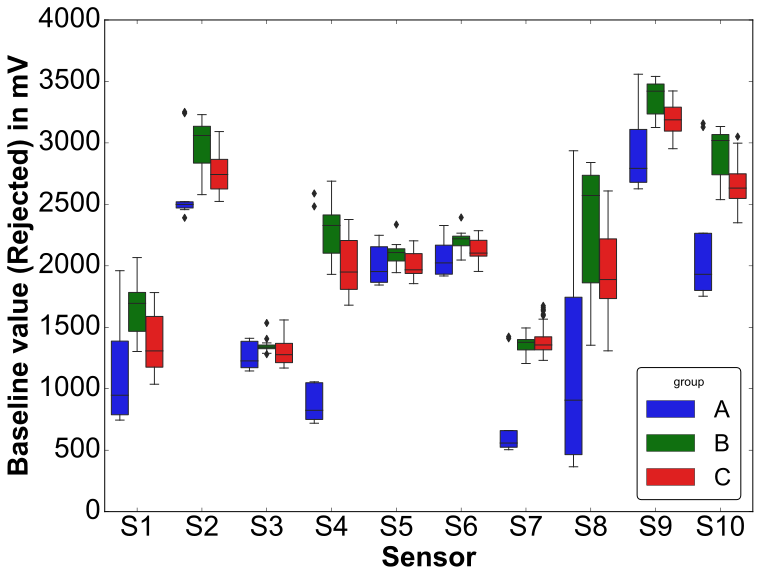

In [5]:
data = baseline[baseline.label.isin([0])].reset_index(drop=True)
fig = plot_box(data, "Baseline value (Rejected) in mV")
fig.savefig(f"out/enose kakao_baseline rejected-boxplot_{tanggal}.svg")

#### Group A

In [6]:
idx = baseline.label.isin([0]) & baseline.group.isin(["A"])
baseline.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1156.726125,2633.114875,1264.675000,1177.214375,2006.671250,2068.724000,734.900000,1282.992000,2951.000000,2181.900000
std,460.491065,325.591424,112.132721,726.009950,156.727360,151.694021,363.634927,989.295773,351.854447,539.569124
min,745.081250,2390.712500,1144.625000,719.436250,1843.832500,1917.320000,504.250000,365.175000,2626.625000,1752.500000
25%,788.515625,2470.725313,1171.156250,750.004375,1866.051563,1931.922500,524.093750,463.755000,2679.593750,1799.562500
50%,947.280625,2499.644375,1226.687500,824.528125,1953.139375,2023.745000,558.062500,907.132500,2792.687500,1930.875000
75%,1387.415625,2520.660937,1385.843750,1048.768750,2154.960000,2168.285000,659.125000,1744.481250,3109.843750,2264.343750
max,1960.537500,3252.221250,1410.250000,2588.628750,2248.201250,2328.060000,1424.250000,2936.160000,3558.750000,3158.375000


#### Group B

In [7]:
idx = baseline.label.isin([0]) & baseline.group.isin(["B"])
baseline.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,1642.557266,2976.681172,1350.828125,2274.794141,2101.253828,2207.451875,1360.734375,2343.502969,3371.414062,2916.023438
std,217.650201,218.723602,57.365910,215.365400,93.259107,77.848443,70.417947,503.266061,137.199905,211.756957
min,1303.160000,2579.282500,1281.000000,1930.707500,1944.591250,2046.900000,1205.500000,1353.997500,3125.125000,2538.625000
25%,1467.327812,2835.977500,1326.000000,2102.997188,2039.742188,2163.362500,1315.781250,1861.370625,3235.718750,2740.937500
50%,1694.422500,3060.517500,1338.000000,2328.539375,2108.036250,2219.545000,1377.750000,2572.181250,3421.062500,3019.812500
75%,1783.410000,3135.352813,1355.531250,2413.847500,2138.439687,2241.187500,1400.000000,2736.326250,3479.156250,3067.875000
max,2067.040000,3230.148750,1535.000000,2688.588750,2335.743750,2393.290000,1494.625000,2840.602500,3540.750000,3133.500000


#### Group C

In [8]:
idx = baseline.label.isin([0]) & baseline.group.isin(["C"])
baseline.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1376.304506,2763.090087,1303.738372,2004.418314,2011.304128,2133.723256,1390.616279,1930.246047,3183.409884,2664.828488
std,222.714564,159.122645,110.096974,213.738832,94.528556,77.316250,119.071471,361.865903,135.315332,168.570394
min,1036.903750,2523.828750,1168.625000,1679.766250,1854.866250,1954.500000,1230.625000,1308.660000,2953.000000,2350.375000
25%,1175.611250,2625.403125,1212.312500,1808.658125,1938.225625,2078.965000,1316.437500,1733.553750,3096.062500,2548.500000
50%,1308.103750,2742.918750,1276.875000,1949.747500,1967.143750,2103.660000,1356.000000,1888.050000,3187.750000,2632.500000
75%,1588.414375,2866.156875,1369.312500,2206.118125,2099.306250,2207.830000,1422.562500,2219.130000,3290.562500,2748.687500
max,1782.703750,3092.263750,1559.625000,2376.957500,2203.096250,2286.040000,1674.750000,2609.265000,3422.375000,3051.250000


### Accepted

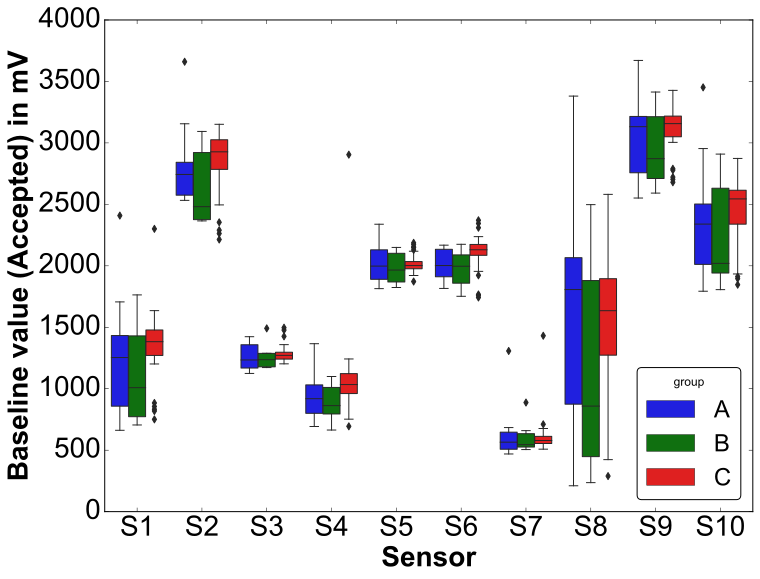

In [9]:
data = baseline[baseline.label.isin([1])].reset_index(drop=True)
fig = plot_box(data, "Baseline value (Accepted) in mV")
fig.savefig(f"out/enose kakao_baseline accepted-boxplot_{tanggal}.svg")

#### Group A

In [10]:
idx = baseline.label.isin([1]) & baseline.group.isin(["A"])
baseline.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,1196.749620,2780.286793,1258.293478,932.407446,2011.110054,2009.155652,600.239130,1514.210217,3011.619565,2325.592391
std,430.196033,268.955471,104.601779,165.958071,145.181074,126.862937,169.609452,856.410104,316.472897,428.712762
min,661.885000,2532.412500,1124.375000,692.512500,1814.247500,1815.790000,469.375000,210.795000,2551.250000,1793.500000
25%,858.151875,2574.581875,1168.437500,799.984375,1890.392500,1911.215000,507.812500,874.466250,2757.375000,2011.750000
50%,1253.722500,2743.600000,1233.875000,919.207500,1997.820000,2001.910000,565.125000,1806.907500,3132.125000,2339.500000
75%,1432.827500,2842.245000,1357.937500,1031.290625,2129.861250,2134.240000,646.625000,2065.912500,3215.562500,2502.687500
max,2408.723750,3660.426250,1423.375000,1366.201250,2338.411250,2168.230000,1307.375000,3380.932500,3670.750000,3451.875000


#### Group B

In [11]:
idx = baseline.label.isin([1]) & baseline.group.isin(["B"])
baseline.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1125.090833,2638.301458,1266.625000,886.804792,1981.431042,1975.436667,611.062500,1163.696250,2955.416667,2250.812500
std,437.607497,340.259168,122.319203,164.746959,139.708761,165.826299,146.157551,947.428100,335.198725,481.973364
min,705.531250,2365.370000,1172.500000,664.250000,1823.705000,1752.210000,504.875000,236.137500,2591.625000,1806.125000
25%,772.695625,2376.031563,1178.031250,794.555000,1868.658437,1858.745000,525.718750,447.538125,2710.718750,1941.562500
50%,1008.441875,2480.978125,1236.312500,862.682500,1965.870625,1996.465000,545.312500,858.772500,2871.562500,2019.750000
75%,1430.108438,2921.304062,1287.750000,1010.465625,2101.731250,2088.892500,634.281250,1879.970625,3213.062500,2631.000000
max,1763.352500,3093.353750,1491.125000,1099.641250,2149.867500,2174.940000,887.750000,2497.665000,3413.750000,2909.000000


#### Group C

In [12]:
idx = baseline.label.isin([1]) & baseline.group.isin(["C"])
baseline.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,1345.076892,2850.872939,1284.158784,1075.145743,2013.998682,2112.046757,605.935811,1527.813243,3110.790541,2450.486486
std,274.802583,246.134166,65.624713,337.694549,72.254621,138.678254,146.972809,543.048076,174.880517,267.898272
min,750.731250,2213.996250,1202.750000,694.148750,1872.326250,1742.420000,508.375000,289.380000,2679.750000,1846.500000
25%,1270.955000,2785.020000,1241.000000,960.857500,1976.237500,2085.620000,554.250000,1273.320000,3049.750000,2339.125000
50%,1382.542500,2927.401250,1271.375000,1033.893750,2002.063750,2130.500000,578.750000,1634.857500,3157.000000,2544.500000
75%,1478.027500,3025.501250,1296.750000,1122.995000,2034.558750,2174.060000,612.750000,1895.257500,3218.125000,2615.125000
max,2300.950000,3151.668750,1496.750000,2904.425000,2187.091250,2370.520000,1431.250000,2581.132500,3427.750000,2873.875000


## Maximum values

In [13]:
list_rawdata = pd.read_csv("data/list_rawdata_butter.csv")

maximum = pd.DataFrame()
for i, item in enumerate(list_rawdata.path.values):
    data = DataGeNose(item)
    x = convert_maxdata(data.open)
    x = pd.DataFrame(x).transpose()
    x.columns = [str(j) for j in x.columns]
    x["label"] = list_rawdata.loc[i, "label"]
    x["group"] = list_rawdata.loc[i, "group"]
    x["names"] = list_rawdata.loc[i, "names"]
    x.index = [i]
    maximum = pd.concat([maximum, x], axis=0)

maximum.to_parquet("data/data_maximum.parquet", index=False)
maximum.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,label,group,names
0,1758.26750,3511.64125,1298.125,2433.1850,2181.15000,2286.04,1303.750,2683.8975,3458.750,3149.625,0,B,TK65-1
1,2128.90750,3693.26250,1359.500,2793.7550,2368.72375,2427.61,1442.250,3194.2350,3626.625,3378.000,0,B,TK39-1
2,2118.87875,3731.54875,1338.375,2775.6075,2339.13875,2406.93,1404.375,3186.5625,3635.000,3417.875,0,B,TK41-1
3,1873.38625,3584.94375,1331.500,2522.4350,2218.85875,2308.81,1379.000,2890.5900,3510.500,3221.875,0,B,TK26-1
4,2067.04000,3682.22625,1335.000,2728.9000,2315.37375,2386.91,1427.250,3132.3900,3604.125,3351.625,0,B,TK42-1


### Accepted

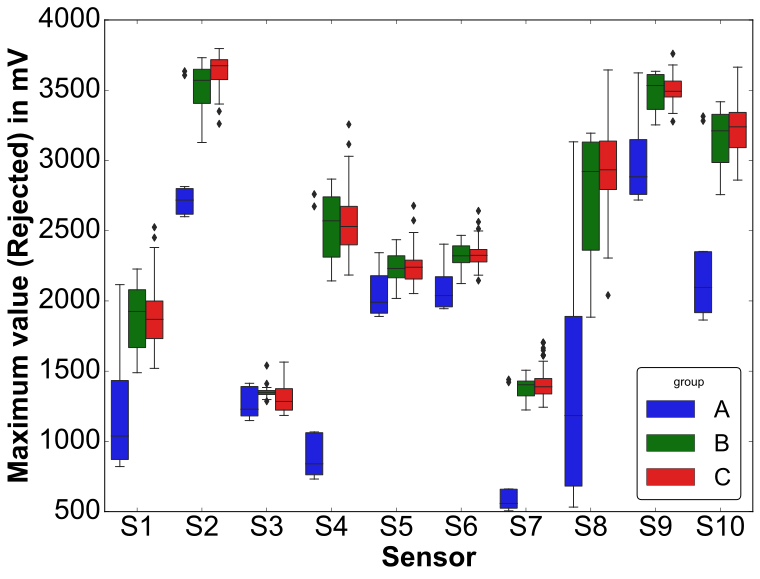

In [14]:
data = maximum[maximum.label.isin([0])].reset_index(drop=True)
fig = plot_box(data, "Maximum value (Rejected) in mV")
fig.savefig(f"out/enose kakao_maximum rejected-boxplot_{tanggal}.svg")

#### Group A

In [15]:
idx = maximum.label.isin([0]) & maximum.group.isin(["A"])
maximum.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1249.937000,2869.440500,1270.787500,1224.011125,2057.717500,2100.272000,738.312500,1495.543500,3023.637500,2307.662500
std,486.315893,402.557901,110.934494,795.520512,170.493281,169.253586,368.894196,975.876731,343.254008,550.595007
min,820.791250,2599.856250,1148.500000,732.228750,1889.786250,1944.930000,506.000000,532.575000,2718.500000,1864.250000
25%,871.676563,2617.670938,1181.656250,762.499375,1912.975313,1957.937500,524.937500,682.188750,2758.750000,1916.687500
50%,1038.175000,2717.712500,1229.187500,840.518750,1990.908750,2038.485000,558.500000,1184.040000,2883.437500,2096.125000
75%,1433.074687,2799.700937,1390.625000,1061.561250,2179.391875,2172.245000,659.500000,1889.735625,3148.250000,2349.875000
max,2116.053750,3635.220000,1413.750000,2759.840000,2343.382500,2404.400000,1440.250000,3132.622500,3623.375000,3314.000000


#### Group B

In [16]:
idx = maximum.label.isin([0]) & maximum.group.isin(["B"])
maximum.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,1872.291563,3496.398281,1357.757812,2527.492500,2234.121094,2320.662500,1382.242188,2748.692344,3490.648438,3146.531250
std,245.651034,208.445686,56.737966,246.552773,117.997743,93.232845,74.137098,461.780593,137.378547,227.008267
min,1489.186250,3127.825000,1286.125000,2142.676250,2018.068750,2123.900000,1224.125000,1884.562500,3253.125000,2756.625000
25%,1668.185312,3406.354063,1334.500000,2312.214063,2165.114687,2272.785000,1324.500000,2361.420000,3363.718750,2985.437500
50%,1925.295625,3570.569375,1347.062500,2570.481250,2231.590000,2321.240000,1403.437500,2921.628750,3533.062500,3211.125000
75%,2079.505312,3648.879063,1362.093750,2740.576875,2321.315000,2391.915000,1429.406250,3130.820625,3611.437500,3328.187500
max,2227.076250,3731.548750,1540.000000,2867.535000,2435.775000,2466.990000,1506.625000,3194.235000,3635.000000,3417.875000


#### Group C

In [17]:
idx = maximum.label.isin([0]) & maximum.group.isin(["C"])
maximum.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1896.702355,3629.177471,1312.546512,2564.199157,2247.961570,2334.168837,1419.735465,2930.639477,3505.968023,3236.563953
std,235.735041,128.899162,108.851895,240.498540,132.152889,98.365236,120.882073,320.504707,98.187272,182.416371
min,1519.837500,3261.077500,1185.000000,2184.475000,2052.625000,2145.350000,1243.500000,2040.570000,3277.500000,2860.250000
25%,1731.995000,3575.951250,1222.875000,2399.567500,2156.111875,2277.955000,1338.250000,2793.288750,3452.062500,3091.437500
50%,1869.007500,3674.596250,1284.625000,2529.872500,2239.956250,2324.210000,1389.000000,2933.835000,3492.250000,3239.375000
75%,1999.522500,3717.310625,1375.125000,2673.267500,2290.396250,2366.340000,1447.562500,3137.853750,3564.812500,3341.750000
max,2524.690000,3796.812500,1564.500000,3256.516250,2677.547500,2641.340000,1704.500000,3644.355000,3760.125000,3664.125000


### Rejected

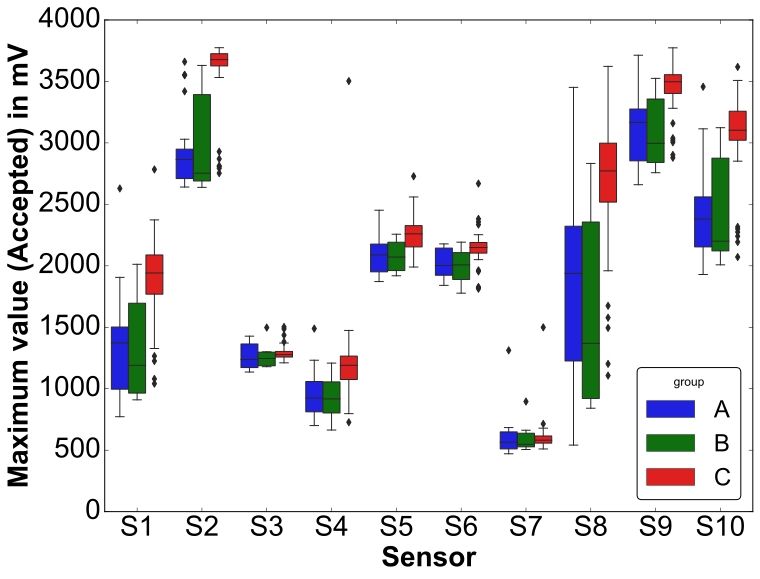

In [18]:
data = maximum[maximum.label.isin([1])].reset_index(drop=True)
fig = plot_box(data, "Maximum value (Accepted) in mV")
fig.savefig(f"out/enose kakao_maximum accepted-boxplot_{tanggal}.svg")

#### Group A

In [19]:
idx = maximum.label.isin([1]) & maximum.group.isin(["A"])
maximum.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,1311.407772,2933.236304,1263.565217,952.424022,2070.063913,2021.882174,602.201087,1752.482283,3084.951087,2425.065217
std,449.005512,310.079722,104.074826,186.132549,149.036911,121.317088,170.132192,777.735642,295.624031,410.830210
min,772.342500,2640.867500,1135.625000,700.247500,1871.962500,1840.760000,471.125000,541.177500,2659.875000,1929.250000
25%,996.294375,2709.810000,1172.062500,812.107500,1951.138750,1923.205000,510.562500,1225.890000,2854.312500,2153.750000
50%,1372.372500,2866.225000,1238.250000,925.603750,2088.272500,2002.900000,565.250000,1938.735000,3167.375000,2380.375000
75%,1501.757500,2949.133125,1364.062500,1058.735000,2176.663750,2144.250000,648.937500,2321.895000,3275.437500,2560.500000
max,2629.356250,3660.426250,1427.750000,1489.366250,2452.507500,2178.130000,1312.375000,3451.845000,3713.250000,3456.875000


#### Group B

In [20]:
idx = maximum.label.isin([1]) & maximum.group.isin(["B"])
maximum.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1342.757083,3008.674375,1275.166667,928.950625,2079.380833,1996.025000,614.291667,1645.087500,3090.520833,2454.791667
std,471.624081,472.146060,121.431865,203.028411,141.680937,161.421614,148.623700,879.990921,326.879225,509.207937
min,909.778750,2638.142500,1179.375000,664.250000,1919.007500,1777.620000,505.875000,841.335000,2757.625000,2007.875000
25%,964.548437,2690.632812,1186.687500,802.810625,1961.596562,1889.517500,527.125000,921.082500,2841.406250,2121.250000
50%,1190.583750,2754.091250,1246.062500,917.199375,2071.782500,2007.465000,548.125000,1369.575000,2996.812500,2200.750000
75%,1695.658437,3392.967500,1297.656250,1055.462500,2191.789688,2107.427500,637.843750,2356.363125,3357.250000,2875.843750
max,2012.376250,3630.315000,1497.750000,1208.823750,2257.052500,2192.650000,895.750000,2833.162500,3524.875000,3123.750000


#### Group C

In [21]:
idx = maximum.label.isin([1]) & maximum.group.isin(["C"])
maximum.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,1896.326014,3547.025743,1294.35473,1205.792466,2267.742162,2144.651351,610.564189,2648.287297,3435.594595,3034.550676
std,364.045542,325.805826,65.69264,422.483136,150.427515,154.662884,157.241815,592.370066,216.206552,389.055001
min,1041.282500,2753.818750,1211.00000,727.320000,1990.060000,1813.590000,510.125000,1107.315000,2879.500000,2071.375000
25%,1769.426250,3626.363750,1258.00000,1074.948750,2154.232500,2103.440000,557.500000,2518.357500,3402.500000,3022.000000
50%,1942.033750,3677.593750,1277.62500,1190.527500,2260.205000,2148.540000,581.375000,2772.480000,3497.500000,3103.125000
75%,2088.510000,3725.962500,1303.62500,1265.646250,2326.892500,2189.900000,615.625000,2998.005000,3555.125000,3257.750000
max,2784.166250,3774.876250,1502.87500,3503.143750,2728.472500,2669.170000,1499.375000,3622.965000,3773.500000,3618.250000


## Different value

In [5]:
list_rawdata = pd.read_csv("data/list_rawdata_butter.csv")

different = pd.DataFrame()
for i, item in enumerate(list_rawdata.path.values):
    data = DataGeNose(item)
    x = convert_diff(data.open)
    x = pd.DataFrame(x).transpose()
    x.columns = [str(j) for j in x.columns]
    x["label"] = list_rawdata.loc[i, "label"]
    x["group"] = list_rawdata.loc[i, "group"]
    x["names"] = list_rawdata.loc[i, "names"]
    x.index = [i]
    different = pd.concat([different, x], axis=0)

different.to_parquet(f"data/data_different_{tanggal}.parquet", index=False)
different.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,label,group,names
0,267.38625,579.74375,9.875,302.40875,154.59375,133.32,15.250,527.3100,152.875,283.000,0,B,TK65-1
1,298.03750,501.12750,6.375,333.49750,205.64000,167.64,26.875,406.1775,136.125,263.500,0,B,TK39-1
2,351.28875,567.07250,9.375,377.23000,209.88375,174.46,24.625,466.1625,159.625,327.875,0,B,TK41-1
3,211.45125,516.38750,6.250,225.35625,118.21875,101.31,14.750,344.7975,108.875,199.500,0,B,TK26-1
4,348.88750,565.02875,8.750,377.08125,206.00375,166.76,44.000,505.6875,159.500,299.875,0,B,TK42-1


### Accepted

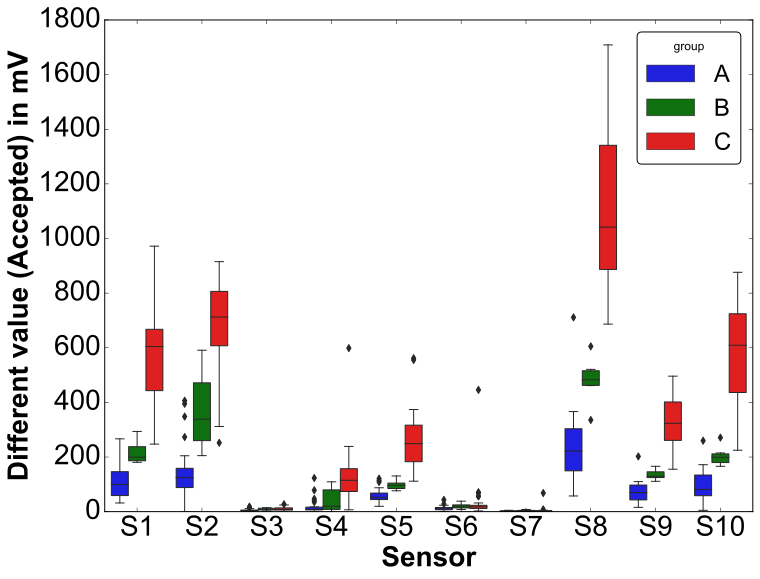

In [8]:
data = different[different.label.isin([1])].reset_index(drop=True)
fig = plot_box(data, "Different value (Accepted) in mV")
fig.savefig(f"out/enose kakao_different accepted-boxplot_{tanggal}.svg")

#### Group A

In [9]:
idx = different.label.isin([1]) & different.group.isin(["A"])
different.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,114.658152,152.949511,5.271739,20.016576,58.953859,12.726522,1.961957,238.272065,73.331522,99.472826
std,65.455472,105.465764,4.993981,29.010786,27.444339,9.337488,1.418944,136.654284,40.484014,58.742552
min,31.922500,0.000000,0.000000,0.000000,19.521250,0.990000,0.125000,57.427500,15.625000,5.000000
25%,58.901250,88.221875,2.312500,6.470625,44.135000,7.150000,0.750000,149.497500,43.000000,58.437500
50%,99.581250,124.668750,4.000000,8.181250,52.865000,10.670000,1.750000,222.037500,69.875000,81.250000
75%,146.335000,158.799375,6.000000,16.362500,68.021250,15.290000,2.937500,303.528750,97.375000,134.125000
max,266.680000,406.161250,18.250000,123.165000,121.007500,43.230000,5.000000,711.217500,202.125000,259.750000


#### Group B

In [10]:
idx = different.label.isin([1]) & different.group.isin(["B"])
different.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,217.666250,370.372917,8.541667,42.145833,97.949792,20.588333,3.229167,481.391250,135.104167,203.979167
std,44.760162,151.221828,4.906416,48.226178,19.542764,10.918167,2.905186,88.579479,19.783266,37.468522
min,180.800000,205.056250,2.125000,0.000000,76.508750,7.590000,0.375000,335.497500,111.125000,166.000000
25%,186.273438,259.930937,6.656250,8.255625,84.662813,13.502500,1.187500,462.268125,124.687500,179.687500
50%,199.445000,338.240625,6.812500,19.858125,96.090625,19.965000,2.375000,482.553750,129.625000,198.875000
75%,237.829688,471.527187,12.500000,79.655625,104.608437,24.612500,4.687500,515.917500,145.812500,211.500000
max,293.800000,590.916250,14.500000,109.182500,130.707500,38.500000,8.000000,605.197500,166.000000,271.125000


#### Group C

In [11]:
idx = different.label.isin([1]) & different.group.isin(["C"])
different.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,37.000000,37.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,551.249122,696.152804,10.195946,130.646723,253.74348,32.604595,4.628378,1120.474054,324.804054,584.064189
std,159.871984,151.259178,6.661622,97.431609,106.15316,71.708848,10.819482,282.808196,84.430622,184.369818
min,247.328750,252.062500,0.000000,6.991250,111.67125,2.420000,0.250000,686.572500,155.250000,224.875000
25%,443.101250,607.266250,5.875000,73.780000,182.96625,11.770000,2.125000,886.755000,260.875000,436.125000
50%,604.408750,712.451250,8.250000,114.686250,249.04750,17.600000,2.875000,1041.832500,323.375000,609.250000
75%,667.547500,806.463750,13.750000,157.228750,316.58375,23.320000,3.375000,1341.292500,401.500000,724.375000
max,972.082500,915.463750,27.125000,598.718750,561.75125,445.830000,68.125000,1708.875000,496.000000,876.250000


### Rejected

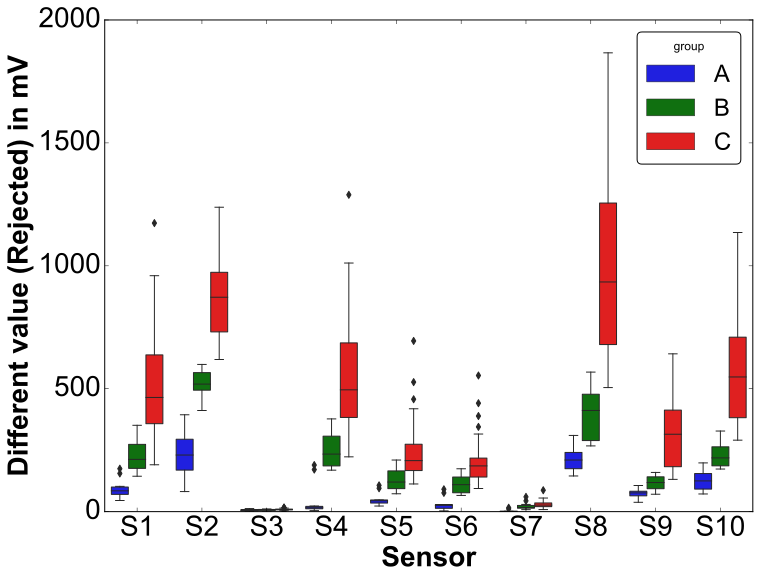

In [12]:
data = different[different.label.isin([0])].reset_index(drop=True)
fig = plot_box(data, "Different value (Rejected) in mV")
fig.savefig(f"out/enose kakao_different rejected-boxplot_{tanggal}.svg")

#### Group A

In [13]:
idx = different.label.isin([0]) & different.group.isin(["A"])
different.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,93.210875,236.325625,6.112500,46.796750,51.046250,31.548000,3.412500,212.551500,72.637500,125.762500
std,42.354407,96.804967,3.431093,70.728264,27.704733,29.129898,5.497174,52.918121,22.335467,40.689391
min,45.482500,81.750000,2.125000,4.165000,22.795000,3.080000,0.000000,145.080000,38.125000,72.000000
25%,70.342500,168.984063,3.593750,11.676875,34.920000,13.640000,0.656250,174.665625,64.437500,91.750000
50%,84.820625,230.194375,5.062500,15.767500,44.195625,25.685000,1.062500,210.063750,76.250000,125.062500
75%,100.040313,294.504375,8.718750,21.605938,47.408750,28.985000,1.687500,240.928125,83.187500,155.062500
max,174.726250,394.035000,12.500000,189.507500,106.942500,90.970000,16.000000,310.155000,106.375000,198.250000


#### Group B

In [14]:
idx = different.label.isin([0]) & different.group.isin(["B"])
different.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,229.734297,519.717109,6.929688,252.698359,132.867266,113.210625,21.507812,405.189375,119.234375,230.507812
std,67.078215,52.075930,2.736698,72.234062,48.890033,38.140903,13.627979,101.986084,28.668903,49.177029
min,144.075000,411.475000,0.000000,168.682500,72.871250,66.110000,8.250000,267.375000,70.875000,173.500000
25%,176.209375,494.246875,5.125000,186.160625,93.544375,76.862500,14.062500,289.113750,93.468750,186.375000
50%,212.793125,518.771875,6.750000,234.206875,120.583125,109.670000,16.875000,411.873750,118.437500,218.562500
75%,273.742500,565.539687,8.906250,306.945625,165.657812,140.745000,25.187500,477.613125,141.531250,263.718750
max,351.288750,598.818750,10.875000,377.230000,209.883750,174.460000,60.125000,567.765000,159.625000,327.875000


#### Group C

In [15]:
idx = different.label.isin([0]) & different.group.isin(["C"])
different.loc[idx, COLS].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,520.397849,866.087384,8.808140,559.780843,236.657442,200.445581,29.119186,1000.393430,322.558140,571.735465
std,230.337125,167.208256,3.378564,244.272922,116.880524,93.796348,14.720889,388.944654,143.220719,221.994100
min,190.828750,618.983750,0.000000,222.976250,112.762500,94.160000,8.500000,504.757500,131.375000,290.875000
25%,357.786250,731.321875,7.250000,383.180000,167.082500,140.800000,20.312500,679.597500,182.812500,382.187500
50%,464.712500,872.272500,8.875000,495.635000,207.580000,186.010000,26.625000,934.417500,314.875000,548.000000
75%,637.602500,973.574375,10.250000,686.481250,274.206875,217.855000,35.437500,1255.500000,413.000000,709.875000
max,1173.787500,1238.240000,16.375000,1288.918750,694.520000,553.850000,87.125000,1866.510000,642.125000,1135.625000
